## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [57]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url ='https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [61]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [65]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag ='\n' 

data1 = data.split(split_tag)[0].split('\t')[1]
print(len(data))
data1

784594


'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [71]:
import pandas as pd
df= pd.read_table('https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt',
                  delimiter='\t',header=None)

df.head()    

#df = pd.DataFrame(arrange_data)
#df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

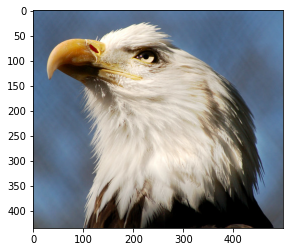

In [97]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link =df.iloc[0,1] 

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [95]:
img.shape

AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [117]:
def img2arr_fromURLs(url_list, resize = True):
    
    img_list=[]
    for url in url_list:
        response = requests.get(url)
        try:
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256,256))                           
            img = np.array(img)          # array is a numpy array 
            img_list.append(img)
        except:
            print('pass  '+url)
    return img_list

In [118]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

pass  http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


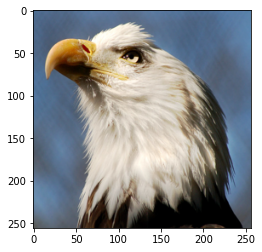

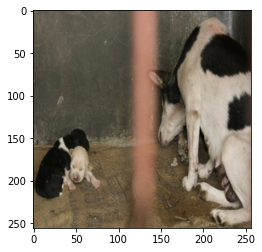

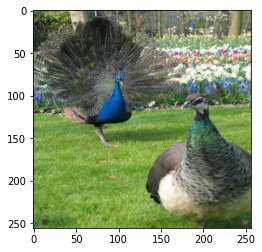

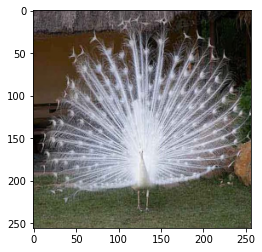

In [110]:
for im_get in result:
    plt.imshow(im_get)
    plt.show()

In [104]:
result

[array([[[ 81, 110, 150],
         [ 78, 110, 148],
         [ 75, 111, 145],
         ...,
         [ 88, 132, 171],
         [ 88, 132, 171],
         [ 89, 131, 171]],
 
        [[ 81, 110, 150],
         [ 78, 110, 148],
         [ 76, 110, 145],
         ...,
         [ 86, 131, 170],
         [ 87, 131, 170],
         [ 88, 130, 170]],
 
        [[ 78, 110, 149],
         [ 77, 109, 147],
         [ 78, 108, 144],
         ...,
         [ 86, 131, 170],
         [ 87, 131, 170],
         [ 88, 130, 170]],
 
        ...,
 
        [[ 84,  88,  87],
         [ 83,  87,  86],
         [ 86,  88,  85],
         ...,
         [ 73,  81,  84],
         [ 75,  80,  84],
         [ 76,  79,  84]],
 
        [[ 83,  87,  86],
         [ 82,  86,  85],
         [ 85,  87,  84],
         ...,
         [ 73,  81,  84],
         [ 75,  80,  84],
         [ 76,  79,  84]],
 
        [[ 83,  87,  86],
         [ 84,  86,  85],
         [ 83,  85,  82],
         ...,
         [ 73,  81,  84],
  

In [112]:
for url in df[0:5][1].values:
    response = requests.get(url)
    print(url)
    img = Image.open(BytesIO(response.content))
    

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000018B66A84AC8>